<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Assignment Questions </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement



PA2312049010006 - Immanuel

### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information: 

**male:** Gender of patient: male(1) or female(0) 

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Distribution of Variables](#dist)**
    - 2.5 - **[Missing Value Treatment](#null)**
    - 2.6 - **[Dummy Encode the Categorical Variables](#dummy)**
    - 2.7 - **[Scale the Data](#scale)**
    - 2.8 - **[Train-Test Split](#split)**
3. **[Logistic Regression (Full Model)](#logit)**
    - 3.1 - **[Identify the Best Cut-off Value](#cut_off)**
        - 3.1.1 - **[Youden's Index](#youden)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [2]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [3]:
#set the plot size 
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first five observations.

In [52]:
# load the csv file
# store the data in 'df_admissions'
df_heart_disease = pd.read_csv('Heart_disease.csv')

# display first five observations using head()
df_heart_disease.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.000000,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,2.000000,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,1.000000,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0
3,0,61,3.000000,1,30.000000,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1
4,0,46,3.000000,1,23.000000,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0


**Let us now see the number of variables and observations in the data.**

In [5]:
df_heart_disease.shape

(4240, 16)

**Interpretation:** The data has 4240 observations and 16 variables.

<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [7]:
df_heart_disease.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
CVD                  int64
dtype: object

**Interpretation:** As per data definition "education" is mentioned as categorical, so we need to change the data type from int64 to object

#### Change the data type as per the data definition.

In [54]:
# convert numerical variables to categorical (object) 
# use astype() to change the data type

# change the data type of 'education'
df_heart_disease[['male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']] = df_heart_disease[['male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']].astype(object)


#### Recheck the data type after the conversion. 

In [8]:
df_heart_disease.dtypes

male                object
age                  int64
education          float64
currentSmoker       object
cigsPerDay         float64
BPMeds              object
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose             object
CVD                  int64
dtype: object

<a id="drop"></a>
## 2.3 Remove Insignificant Variables, if its applicable.

The column education is insignificant to the heart disease analysis hence we drop the column before further analysis

In [55]:
# drop the column 'education' using drop()
# 'axis = 1' drops the specified column
df_heart_disease = df_heart_disease.drop('education', axis = 1)

<a id="dist"></a>
## 2.4 Distribution of Variables

**Distribution of numeric independent variables.**

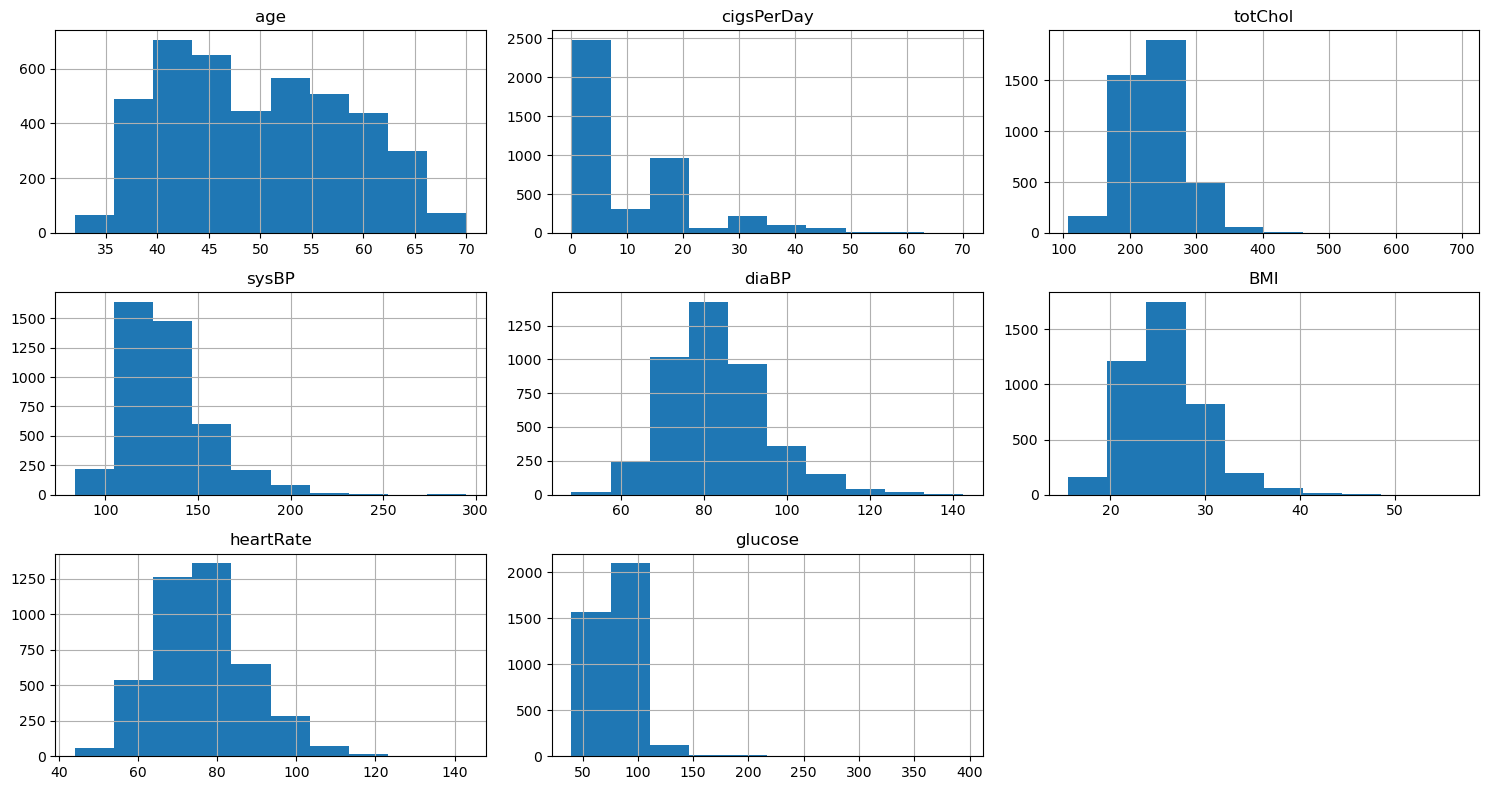

Skewness:


male               0.285997
age                0.228867
currentSmoker      0.023595
cigsPerDay         1.247052
BPMeds             5.551462
prevalentStroke   12.912160
prevalentHyp       0.818827
diabetes           5.995907
totChol            0.871881
sysBP              1.145285
diaBP              0.713250
BMI                0.982183
heartRate          0.644372
glucose            6.214948
dtype: float64

In [56]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
df_heart_disease.drop('CVD', axis = 1).hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df_heart_disease.drop('CVD', axis = 1).skew()

**Interpretation**: checking the data distrubtion for normality check and learnt that variables 'cigsPerDay' and 'sysBP' are not positively skewed and to treat it. Used couple of methods like log transformation and reciprocal method which works well for positively skewed data however do not any changes post implementing it. We need to see what is the forecast predicted performance and try to fine tune it in later stage.

In [57]:
# Log transformation for selected columns
df_transform = df_heart_disease.copy()
#[['sysBP','cigsPerDay']]

# df_transform[['sysBP','cigsPerDay']] = np.log1p(df_transform[['sysBP','cigsPerDay']])
df_transform[['sysBP','cigsPerDay']] = 1/(df_transform[['sysBP','cigsPerDay']])
df_transform.replace([np.inf, -np.inf], 0, inplace=True)

# Output
print(df_transform)

      male  age  currentSmoker  cigsPerDay   BPMeds  prevalentStroke  \
0        1   39              0    0.000000 0.000000                0   
1        0   46              0    0.000000 0.000000                0   
2        1   48              1    0.050000 0.000000                0   
3        0   61              1    0.033333 0.000000                0   
4        0   46              1    0.043478 0.000000                0   
5        0   43              0    0.000000 0.000000                0   
6        0   63              0    0.000000 0.000000                0   
7        0   45              1    0.050000 0.000000                0   
8        1   52              0    0.000000 0.000000                0   
9        1   43              1    0.033333 0.000000                0   
10       0   50              0    0.000000 0.000000                0   
11       0   43              0    0.000000 0.000000                0   
12       1   46              1    0.066667 0.000000             

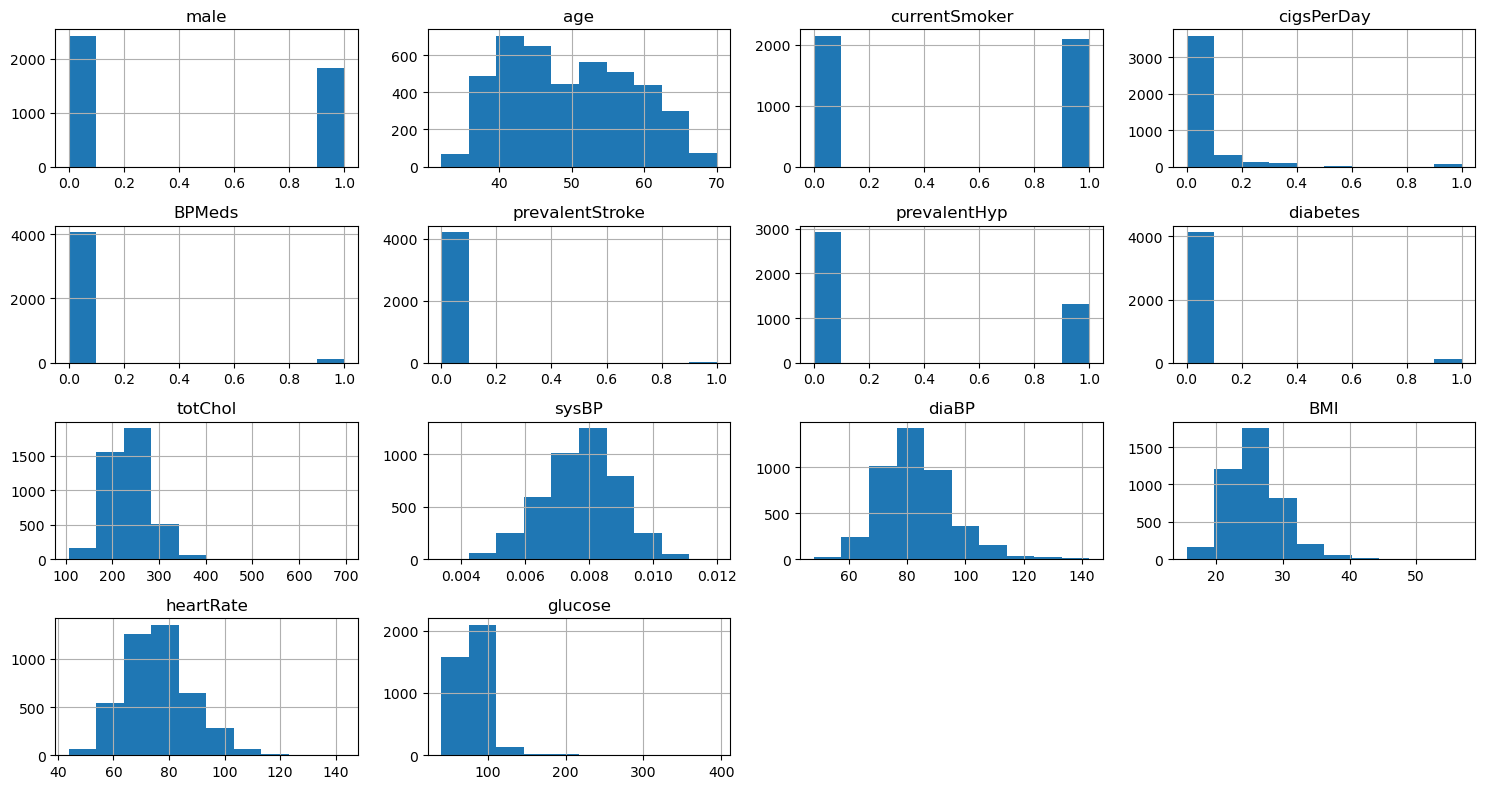

Skewness:


male               0.285997
age                0.228867
currentSmoker      0.023595
cigsPerDay         1.247052
BPMeds             5.551462
prevalentStroke   12.912160
prevalentHyp       0.818827
diabetes           5.995907
totChol            0.871881
sysBP              1.145285
diaBP              0.713250
BMI                0.982183
heartRate          0.644372
glucose            6.214948
dtype: float64

In [32]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# df_heart_disease.drop('CVD', axis = 1).hist()
df_transform.drop('CVD', axis = 1).hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df_heart_disease.drop('CVD', axis = 1).skew()

In [30]:
df_transform.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
CVD                  int64
dtype: object

In [59]:
df_heart_disease.dtypes

male                object
age                  int64
currentSmoker       object
cigsPerDay         float64
BPMeds              object
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
CVD                  int64
dtype: object

**Distribution of categoric independent variable.**

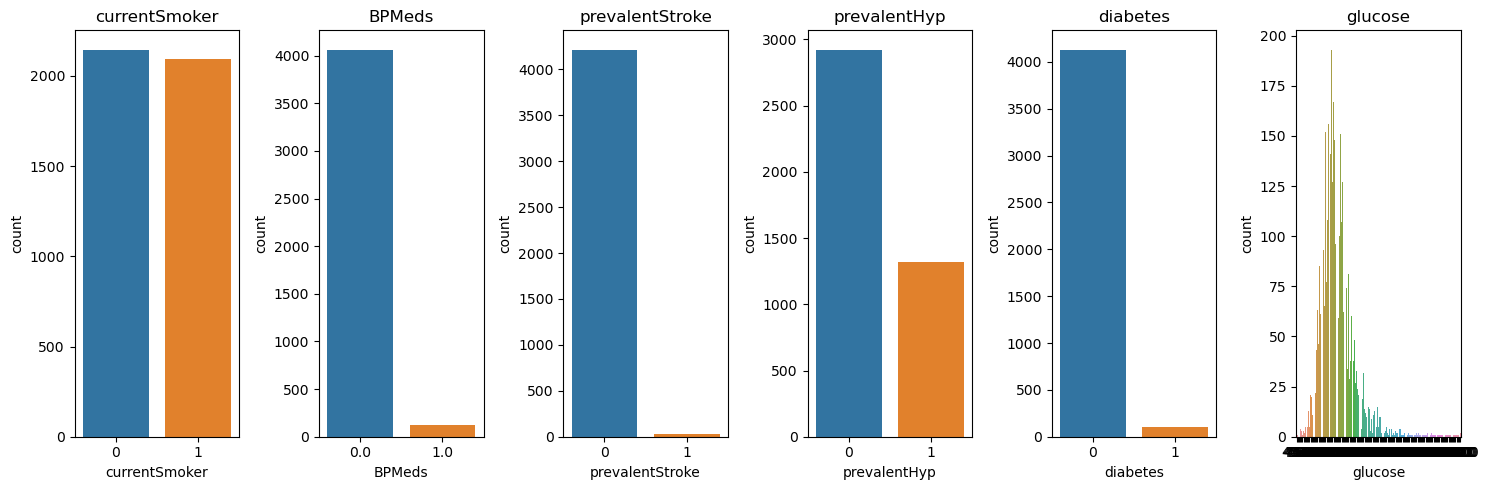

In [58]:
# for the independent categoric variable, we plot the count plot to check the distribution of the variables 'currentSmoker',
#BPMeds,prevalentStroke,prevalentHyp,diabetes,glucose
# use countplot() to plot the count of each label in the categorical variable 


fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 5))



sns.countplot(x='currentSmoker', data=df_heart_disease, ax=axes[0])
axes[0].set_title('currentSmoker')

sns.countplot(x='BPMeds', data=df_heart_disease, ax=axes[1])
axes[1].set_title('BPMeds')

sns.countplot(x='prevalentStroke', data=df_heart_disease, ax=axes[2])
axes[2].set_title('prevalentStroke')

sns.countplot(x='prevalentHyp', data=df_heart_disease, ax=axes[3])
axes[3].set_title('prevalentHyp')

sns.countplot(x='diabetes', data=df_heart_disease, ax=axes[4])
axes[4].set_title('diabetes')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#### Distribution of dependent variable.

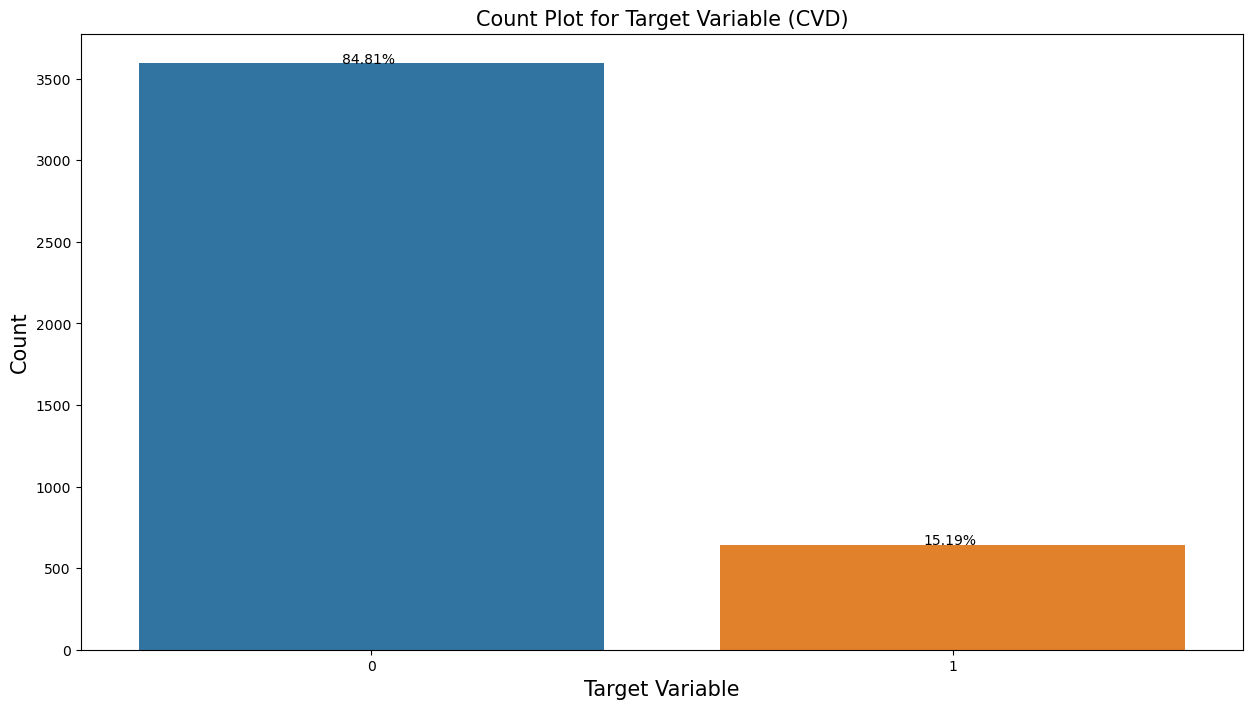

In [14]:
# consider only the target variable
df_target = df_heart_disease['CVD'].copy()

# get counts of 0's and 1's in the 'Chance of Admit' variable
df_target.value_counts()

# plot the countplot of the variable 'Chance of Admit'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (CVD)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

<a id="null"></a>
## 2.5 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [60]:
Total = df_heart_disease.isnull().sum().sort_values(ascending=False)
Percent = (df_heart_disease.isnull().sum()*100/df_heart_disease.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
glucose,388,9.150943
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585
male,0,0.000000
age,0,0.000000
currentSmoker,0,0.000000
prevalentStroke,0,0.000000


In [61]:
missing_value_columns = ['glucose','BPMeds','totChol','cigsPerDay','BMI','heartRate']
#fill missing values with mean for each column
for column in missing_value_columns:
    mean_value = df_heart_disease[column].mean()
    df_heart_disease[column].fillna(value=mean_value, inplace=True)

In [62]:
Total = df_heart_disease.isnull().sum().sort_values(ascending=False)
Percent = (df_heart_disease.isnull().sum()*100/df_heart_disease.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
male,0,0.000000
age,0,0.000000
currentSmoker,0,0.000000
cigsPerDay,0,0.000000
BPMeds,0,0.000000
prevalentStroke,0,0.000000
prevalentHyp,0,0.000000
diabetes,0,0.000000
totChol,0,0.000000
sysBP,0,0.000000


**Interpretation**:Columns ['glucose','BPMeds','totChol','cigsPerDay','BMI','heartRate'] had missing values which is replaced with the mean of the columns values

<a id="dummy"></a>
## 2.6 Dummy Encode the Categorical Variables

#### Split the dependent and independent variables.

In [63]:
# store the target variable 'CVD' in a dataframe 'df_target'
df_target = df_heart_disease['CVD']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'CVD' using drop()
# 'axis = 1' drops the specified column
df_feature = df_heart_disease.drop('CVD', axis = 1)

#### Filter numerical and categorical variables.

In [64]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['age', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'],
      dtype='object')

In [65]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
#df_cat = df_feature.select_dtypes(include = [np.object])
df_cat = df_feature.select_dtypes(include=['object'])



# display categorical features
df_cat.columns

Index(['male', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes'], dtype='object')

The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [66]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

<a id="scale"></a>
## 2.7 Scale the Data 

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [67]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

#### Concatenate scaled numerical and dummy encoded categorical variables.

In [68]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

# display first five observations
X.head()

,age,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_1,currentSmoker_1,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,-1.234283,-0.758062,-0.175800,-0.940825,-1.196267,-1.083027,0.287258,0.342775,-0.217427,1,0,0,0,0
1,-0.417664,-0.758062,-0.175800,0.300085,-0.515399,-0.159355,0.719668,1.590435,-0.261231,0,0,0,0,0
2,-0.184345,0.925410,-0.175800,0.187275,-0.220356,-0.243325,-0.113213,-0.073111,-0.524054,1,1,0,0,0
3,1.332233,1.767146,-0.175800,-0.263965,0.800946,1.016227,0.682815,-0.904884,0.921472,0,1,0,1,0
4,-0.417664,1.177931,-0.175800,1.089756,-0.106878,0.092555,-0.663554,0.758662,0.133004,0,1,0,0,0


<a id="split"></a>
## 2.8 Train-Test Split

Before applying various classification techniques to predict the patient having cardiovascular disease or not, let us split the dataset in train and test set.

In [69]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (3392, 15)
y_train (3392,)
X_test (848, 15)
y_test (848,)


In [70]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

<a id="logit"></a>
# 3. Logistic Regression (Full Model)

#### Build a full logistic model on a training dataset.

In [71]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.381738
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3377
Method:                           MLE   Df Model:                           14
Date:                Tue, 03 Oct 2023   Pseudo R-squ.:                  0.1047
Time:                        23:38:45   Log-Likelihood:                -1294.9
converged:                       True   LL-Null:                       -1446.3
Covariance Type:            nonrobust   LLR p-value:                 3.073e-56
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.2343      0.124    -17.987      0.000      -2.478      -1.991
age     

**Interpretation**: The Pseudo R-squ. obtained from the above model summary is the value of McFadden's R-squared. This value can be obtained from the formula:

McFadden's R-squared =  1−𝐿𝑜𝑔−𝐿𝑖𝑘𝑒𝑙𝑖ℎ𝑜𝑜𝑑𝐿𝐿−𝑁𝑢𝑙𝑙
 

Where,
Log-Likelihood: It is the maximum value of the log-likelihood function
LL-Null: It is the maximum value of the log-likelihood function for the model containing only the intercept

The LLR p-value is less than 0.05, implies that the model is significant.

There are different types of pseudo R-squared such as Cox & Snell R-squared, Nagelkerke R-squared and so on.

Cox & Snell R-squared: The convergence of the logistic model can be determined by the R-squared value. It is given by the formula:

Cox & Snell R-squared = 1−(𝐿(𝑀𝐼𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡)𝐿(𝑀𝐹𝑢𝑙𝑙))2/𝑁

Where,
L(M): The conditional probability of target variable given the independent variables
N: Total number of observations

Note: The maximum of Cox & Snell R-squared is always less than 1. It is equal to (1−(𝐿(𝑀𝐼𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡)2/𝑁)
Nagelkerke R-squared: It is defined as the ratio of Cox & Snell R-squared to the maximum of Cox & Snell R-squared. The formula is given as:

Nagelkerke R-squared = 1−(𝐿(𝑀𝐼𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡)𝐿(𝑀𝐹𝑢𝑙𝑙))2/𝑁1−(𝐿(𝑀𝐼𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡)2/𝑁

Thus, Nagelkerke R-squared can be equal to 1, if 𝐿(𝑀𝐹𝑢𝑙𝑙)=1
Calculate the AIC (Akaike Information Criterion) value.

It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

**Calculate the AIC (Akaike Information Criterion) value.**

It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

In [72]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg.aic)

AIC: 2619.711927863492


We can use the AIC value to compare different models created on the same dataset.

### Interpret the odds for each variable 

In [73]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 

# print the dataframe
df_odds

,Odds
const,0.107072
age,1.709083
cigsPerDay,1.246633
BPMeds,1.038524
totChol,1.070435
sysBP,1.252416
diaBP,1.023297
BMI,1.063896
heartRate,0.996222
glucose,1.174097


**Interpretation:** 

#Write the interpretation of How does a unit change in each feature influence the odds of a patient having a #cardiocascular disease?


odds_const: The odds of heart disease is 0.107072, considering all other variables take zero value

age = 1.709083, it implies that the odds of getting heart disease increases by a factor of 1.709083 due to one unit increase in the age, keeping other variables constant

cigsPerDay = 1.246633, it implies that the odds of getting heart disease increases by a factor of 1.246633 due to one unit increase ciggerette count a person smokes, keeping other variables constant

BPMeds = 1.038524, it implies that the odds of getting heart disease increases by a factor of 1.038524 due to one unit increase the BP medications taken by an individuals, keeping other variables constant

totChol = 1.070435, it implies that the odds of getting heart disease increases by a factor of 1.070435 due to one unit increase total cholestrol, keeping other variables constant

sysBP = 1.252416, it implies that the odds of getting heart disease increases by a factor of 1.252416 due to one unit increase in the sysBP, keeping other variables constant

diaBP = 1.023297, it implies that the odds of getting heart disease increases by a factor of 1.023297 due to one unit dicrease in the diaBP, keeping other variables constant

BMI = 1.063896, it implies that the odds of getting heart disease increases by a factor of 1.063896 due to one unit increase in the diaBP, keeping other variables constant


heartRate = 0.996222, it implies that the odds of getting heart disease is 0.996222 ,due to one unit increase in the heartRate, keeping other variables constant

glucose = 1.174097, it implies that the odds of getting heart disease increases by 1.174097 due to one unit increase in the blood sugar content, keeping other variables constant

male_1 = 1.567189, it implies that the odds of getting heart disease for male individuals compared to female individuals is 1.567189, keeping other variables constant

currentSmoker_1 = 0.986995, it implies that the odds of getting heart disease for smoker vs non smoker is 0.986995, keeping other variables constant

prevalentStroke_1 = 2.176910,it implies that the odds of getting heart disease are higher in individuals with with prior or existing heart conditions  to those with no prevalent Stroke is 2.176910, keeping other variables constant

prevalentHyp_1 = 1.273379,it implies that the odds of getting heart disease in individuals with hypertension compared to those with no hypertension is 1.273379, keeping other variables constant

diabetes_1 = 1.168403,it implies that the odds of getting heart disease for diabetic individuals compared to non diabetic is 1.168403, keeping other variables constant

**Do predictions on the test set.**

In [74]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

742    0.139843
1109   0.056273
2798   0.158219
3316   0.082296
1126   0.099689
dtype: float64

Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1.

In [75]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [76]:
# print the first five observations of y_pred
y_pred[0:5]

[0, 0, 0, 0, 0]

#### Plot the confusion matrix.

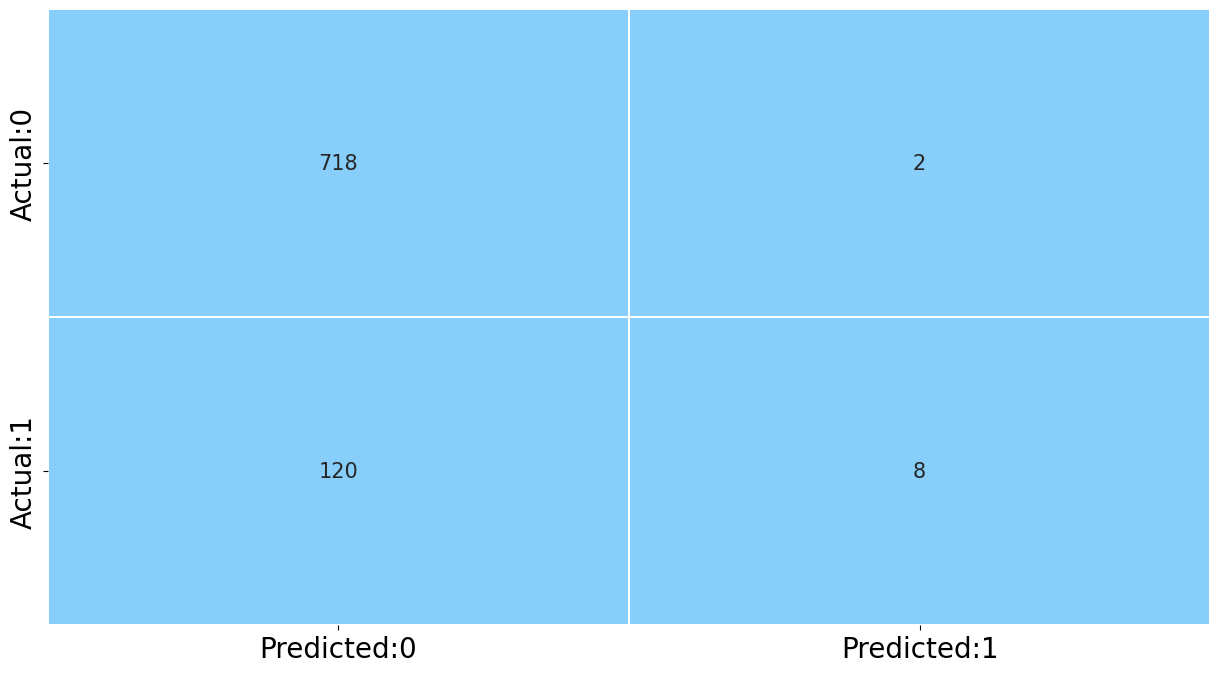

In [77]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [79]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

In [83]:
print(TN)
print(TP)
print(FP)
print(FN)

718
8
2
120


**Compute various performance metrics.**

**Precision:** It is defined as the ratio of true positives to the total positive predictions.

In [80]:
# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.8

**Recall:** It is the ratio of true positives to the total actual positive observations. It is also known as, `Sensitivity` or `True Positive Rate`.

In [84]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.0625

**Specificity:** It is the ratio of true negatives to the total actual negative observations.

In [85]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.9972222222222222

**f1-score:** It is defined as the harmonic mean of precision and recall.

In [86]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score

0.11594202898550725

**Accuracy:** It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the dataset is imbalanced.

In [87]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.8561320754716981

In [88]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       720
           1       0.80      0.06      0.12       128

    accuracy                           0.86       848
   macro avg       0.83      0.53      0.52       848
weighted avg       0.85      0.86      0.80       848



**Interpretation:** Write inference regarding the accuracy of the logistic regression model.

We can also calculate the above measures using the `classification_report()`

**Kappa score:** It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [89]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.09616997483925072


**Interpretation:** heart disease prediction model, Kappa value of 0.09616997483925072 could indicate that the model's predictions do not significantly agree with the actual outcomes. This might imply that the model needs improvement, possibly by refining features, trying different algorithms, or employing more sophisticated techniques to capture the complexity of heart disease patterns in the data.

#### Plot the ROC curve.

ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.

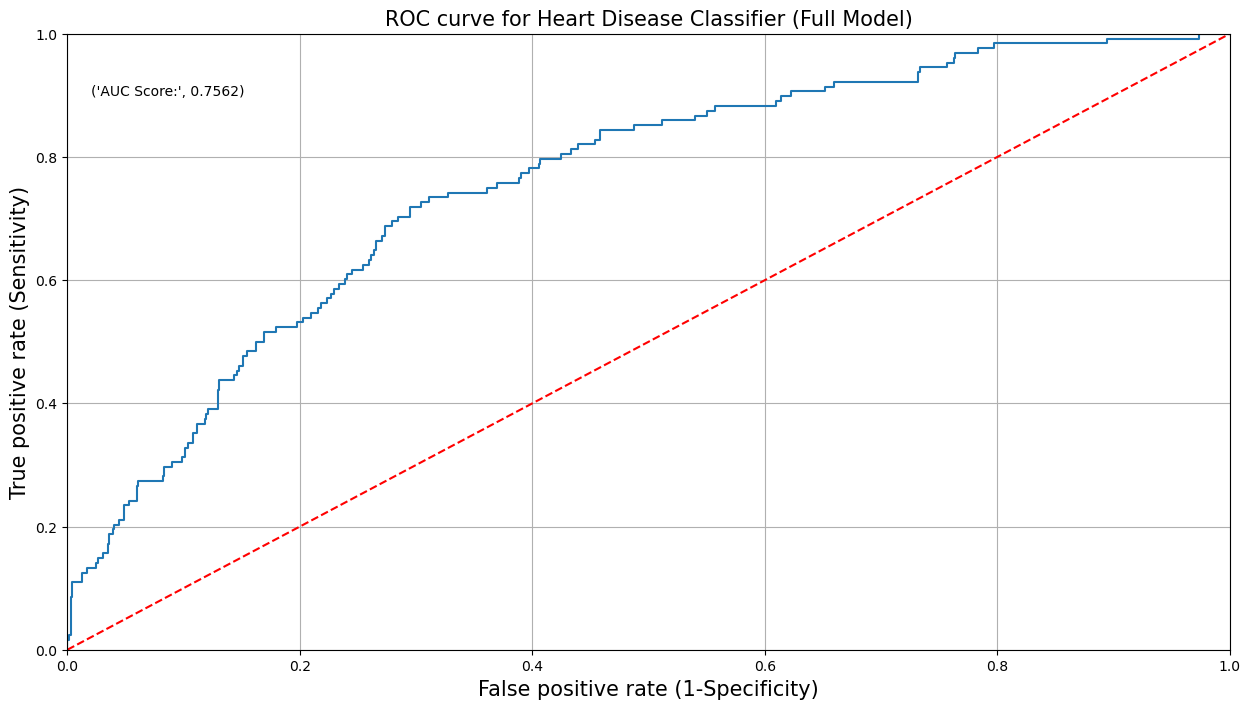

In [91]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Heart Disease Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

**Interpretation**: The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
From the above plot, we can see that our classifier (logistic regression) is away from the dotted line; with the AUC score 0.7562.


<a id="cut_off"></a>
## 3.1 Identify the Best Cut-off Value

In [93]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(logreg, value)

In [94]:
# print the score card 
print('Heart Disease report for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Heart Disease report for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.664410,0.223577,0.859375,0.528302,0.151593,0.354839
1,0.100000,0.664410,0.223577,0.859375,0.528302,0.151593,0.354839
2,0.200000,0.666319,0.322275,0.531250,0.760613,0.262628,0.401180
3,0.200000,0.666319,0.322275,0.531250,0.760613,0.262628,0.401180
4,0.300000,0.602257,0.435897,0.265625,0.837264,0.243640,0.330097
5,0.300000,0.602257,0.435897,0.265625,0.837264,0.243640,0.330097
6,0.400000,0.557378,0.566667,0.132812,0.853774,0.167469,0.215190
7,0.400000,0.557378,0.566667,0.132812,0.853774,0.167469,0.215190
8,0.500000,0.529861,0.800000,0.062500,0.856132,0.096170,0.115942
9,0.500000,0.529861,0.800000,0.062500,0.856132,0.096170,0.115942


<a id="youden"></a>
### 3.1.1 Youden's Index

In [95]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.718750,0.294444,0.156667,0.424306
1,0.734375,0.311111,0.151420,0.423264
2,0.726562,0.304167,0.154545,0.422396
3,0.703125,0.284722,0.159565,0.418403
4,0.695312,0.279167,0.160815,0.416146


As we can see that the optimal cut-off probability is approximately 0.42. Let us consider this cut-off to predict the target values. i.e. if 'y_pred_prob' is less than 0.40, then consider it to be 0 else consider it to be 1.

In [101]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.40 else 1 for x in y_pred_prob]

#### Plot the confusion matrix, with the optimal threshold computed using Youden's index method.

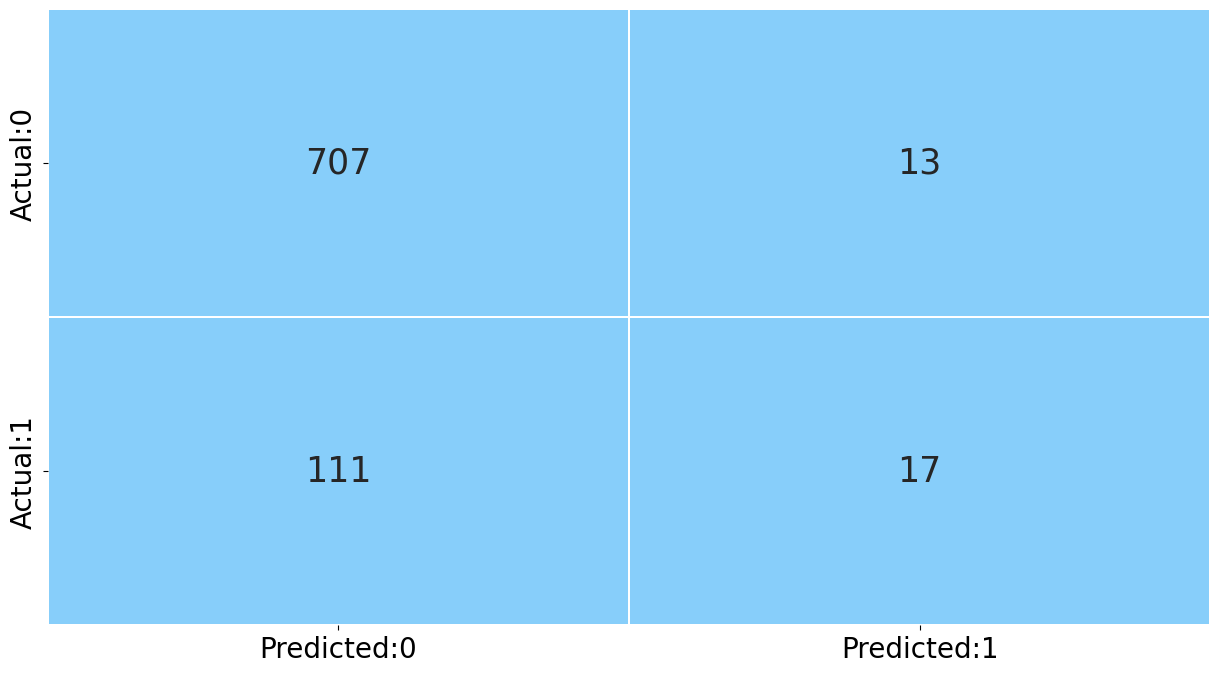

In [102]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_youden)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Compute various performance metrics using classification report.**

In [103]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_youden)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       720
           1       0.57      0.13      0.22       128

    accuracy                           0.85       848
   macro avg       0.72      0.56      0.57       848
weighted avg       0.82      0.85      0.81       848



**Interpretation:** From the above output, we can see that the model with cut-off = 0.40, is 85% accurate. The specificity and the sensitivity are nearly balanced.